# Packages

In [1]:
import pandas as pd
import pytz,dateutil
import datetime, pytz
#define a conversion function for the native timestamps in the csv file
def dateparse (time_in_secs):    
    return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve
import statsmodels.api as sm
import warnings
from itertools import product
from sklearn.linear_model import LogisticRegression
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from xgboost import plot_importance, plot_tree
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from datetime import datetime, timedelta
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score
from xgboost.sklearn import XGBClassifier
from math import sqrt
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import SVR
%matplotlib inline

# Preprocessing the raw bitcoin dataset

In [4]:
data = pd.read_csv('D:/金融辅修毕业论文—数字货币/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv',parse_dates=[0], date_parser=dateparse) 
data['Timestamp'] = data['Timestamp'].dt.tz_localize(None)
data = data.groupby([pd.Grouper(key='Timestamp', freq='H')]).first().reset_index()
data = data.set_index('Timestamp')

检查数据整体格式

In [5]:
data.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 15:00:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.drop(['Volume_(BTC)','Volume_(Currency)','Weighted_Price'],axis=1,inplace=True)#Just dropping columns here!

In [7]:
data.isnull().any()   #检查是否存在空值

Open     True
High     True
Low      True
Close    True
dtype: bool

In [8]:
data.dropna(axis=0, how='all')  #将存在空值的行全部清除

,Open,High,Low,Close
Timestamp,,,,
2011-12-31 15:00:00,4.39,4.39,4.39,4.39
2011-12-31 23:00:00,4.39,4.39,4.39,4.39
2012-01-01 00:00:00,4.50,4.57,4.50,4.57
2012-01-01 01:00:00,4.58,4.58,4.58,4.58
2012-01-01 12:00:00,4.58,4.58,4.58,4.58
...,...,...,...,...
2021-03-31 04:00:00,59118.91,59135.00,59023.96,59037.79
2021-03-31 05:00:00,58644.04,58670.91,58591.06,58591.06
2021-03-31 06:00:00,58758.44,58762.56,58758.44,58762.56


对数据集的训练集与测试集进行分割，分割点为2021年3月1日

In [9]:
split_date = '01-Mar-2021'
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()

In [10]:
data_test

,Open,High,Low,Close
Timestamp,,,,
2021-03-01 01:00:00,43582.71,43582.71,43490.20,43525.18
2021-03-01 02:00:00,43128.48,43169.13,43100.00,43169.13
2021-03-01 03:00:00,43741.54,43851.30,43741.54,43836.51
2021-03-01 04:00:00,44507.89,44597.51,44507.89,44597.51
2021-03-01 05:00:00,44963.82,45100.00,44961.31,45080.57
...,...,...,...,...
2021-03-31 04:00:00,59118.91,59135.00,59023.96,59037.79
2021-03-31 05:00:00,58644.04,58670.91,58591.06,58591.06
2021-03-31 06:00:00,58758.44,58762.56,58758.44,58762.56


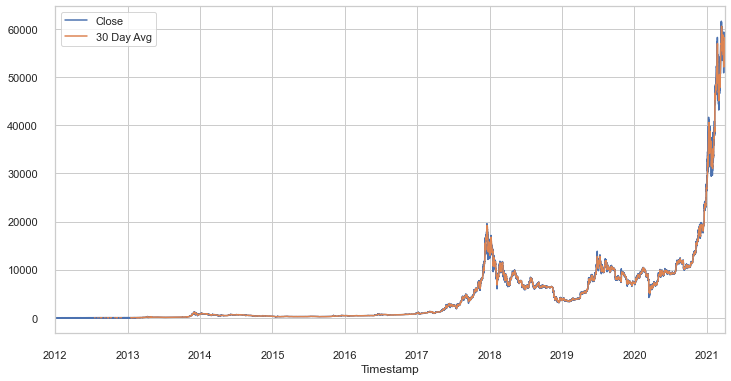

In [11]:
sns.set()
sns.set_style('whitegrid')
data['Close'].plot(figsize=(12,6),label='Close')
data['Close'].rolling(window=30).mean().plot(label='30 Day Avg')# Plotting the 
#rolling 30 day average against the Close Price
plt.legend()

In [12]:
data['ohlc_average'] = (data['Open'] + data['High'] + data['Low'] + data['Close']) / 4

In [13]:
data['Price_After_Month']=data['Close'].shift(-30) #This will be our label

In [14]:
data.dropna(inplace=True)
X=data.drop('Price_After_Month',axis=1)
X=preprocessing.scale(X)#We need to scale our values to input them in our model  #防止某个特征过大或过小，从而在训练中起的作用不平衡
y=data['Price_After_Month']

In [55]:
y

Timestamp
2012-01-01 00:00:00        5.00
2012-01-03 19:00:00        5.57
2012-01-04 12:00:00        6.19
2012-01-04 13:00:00        6.46
2012-01-05 00:00:00        6.43
                         ...   
2021-03-29 22:00:00    59037.79
2021-03-29 23:00:00    58591.06
2021-03-30 00:00:00    58762.56
2021-03-30 01:00:00    58657.09
2021-03-30 02:00:00    58778.18
Name: Price_After_Month, Length: 75821, dtype: float64

训练集与测试集按照30%比例进行切割

In [15]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.3,random_state=101)

真实数据一览

In [48]:
Actual_Data=[58849.76,59280.83,58670.40,59067.71,58410.16,58083.95,58850.00,58202.47
                   ,55788.70,57924.82,57766.58,58373.14,59928.10,
                   59924.77,62744.72,62058.31,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [49]:
Actual_BitcoinPrice=pd.DataFrame(Actual_Data,columns=['Actual_Price'],index=date)
Actual_BitcoinPrice=Actual_BitcoinPrice[~Actual_BitcoinPrice['Actual_Price'].isin([1])]
Actual_BitcoinPrice

,Actual_Price
2021-03-31 02:00:00,58849.76
2021-04-01 02:00:00,59280.83
2021-04-02 02:00:00,58670.40
2021-04-03 02:00:00,59067.71
2021-04-04 02:00:00,58410.16
2021-04-05 02:00:00,58083.95
2021-04-06 02:00:00,58850.00
2021-04-07 02:00:00,58202.47
2021-04-08 02:00:00,55788.70
2021-04-09 02:00:00,57924.82


# Random Forest Regression

In [17]:
reg=RandomForestRegressor(n_estimators=200,random_state=101)
reg.fit(X_train,y_train)
accuracy=reg.score(X_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')

Accuracy is: 99.6224 %


In [18]:
preds = reg.predict(X_test)
print("The prediction is:",preds[1],"But the real value is:" ,y_test[1])

The prediction is: 6379.096599999999 But the real value is: 6234.34


In [19]:
#Apply our model and get our prediction
X_30=X[-30:]  #We'll take the last 30 elements to make our predictions on them
forecast=reg.predict(X_30)

In [20]:
forecast_test=reg.predict(X_test)
forecast
y_test

Timestamp
2014-09-04 17:00:00      485.90
2018-07-12 12:00:00     6234.34
2012-10-12 19:00:00       11.96
2019-09-15 14:00:00    10207.95
2013-02-02 09:00:00       20.00
                         ...   
2020-04-08 06:00:00     7282.27
2021-01-07 02:00:00    39555.76
2020-07-29 11:00:00    11000.01
2013-12-04 21:00:00     1034.34
2016-12-23 23:00:00      899.11
Name: Price_After_Month, Length: 22747, dtype: float64

In [21]:
#creating a new column which contains the predictions! 
#Proceed at your own risk!  
from datetime import datetime, timedelta
last_date=data.iloc[-1].name
modified_date = last_date + timedelta(days=1)
date=pd.date_range(modified_date,periods=30,freq='D')
df1=pd.DataFrame(forecast,columns=['Forecast_RFR'],index=date)
data1=data.append(df1)
data1.tail()

,Open,High,Low,Close,ohlc_average,Price_After_Month,Forecast_RFR
2021-04-25 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,58507.59165
2021-04-26 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,57599.28785
2021-04-27 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,57855.12020
2021-04-28 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,58129.16475
2021-04-29 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,58306.17290


In [22]:
data1

,Open,High,Low,Close,ohlc_average,Price_After_Month,Forecast_RFR
2012-01-01 00:00:00,4.50,4.57,4.50,4.57,4.535,5.00,NaN
2012-01-03 19:00:00,5.32,5.32,5.32,5.32,5.320,5.57,NaN
2012-01-04 12:00:00,4.93,4.93,4.93,4.93,4.930,6.19,NaN
2012-01-04 13:00:00,4.93,4.93,4.93,4.93,4.930,6.46,NaN
2012-01-05 00:00:00,5.36,5.37,5.36,5.37,5.365,6.43,NaN
...,...,...,...,...,...,...,...
2021-04-25 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,58507.59165
2021-04-26 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,57599.28785
2021-04-27 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,57855.12020
2021-04-28 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,58129.16475


In [23]:
wq=data1.iloc[75821:75851,]
qwq=wq.iloc[0:16,]
qwq

,Open,High,Low,Close,ohlc_average,Price_After_Month,Forecast_RFR
2021-03-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,56821.25865
2021-04-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,57468.95355
2021-04-02 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,56777.71720
2021-04-03 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,55668.31835
2021-04-04 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,57750.60205
2021-04-05 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,56732.71850
2021-04-06 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,57261.99815
2021-04-07 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,57295.98130
2021-04-08 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,55905.11710
2021-04-09 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,56687.90435


In [24]:
Forecast_RFR_Frame=qwq.drop(['Open','High','Low','Close','ohlc_average','Price_After_Month'],axis=1)
Forecast_RFR_Frame

,Forecast_RFR
2021-03-31 02:00:00,56821.25865
2021-04-01 02:00:00,57468.95355
2021-04-02 02:00:00,56777.71720
2021-04-03 02:00:00,55668.31835
2021-04-04 02:00:00,57750.60205
2021-04-05 02:00:00,56732.71850
2021-04-06 02:00:00,57261.99815
2021-04-07 02:00:00,57295.98130
2021-04-08 02:00:00,55905.11710
2021-04-09 02:00:00,56687.90435


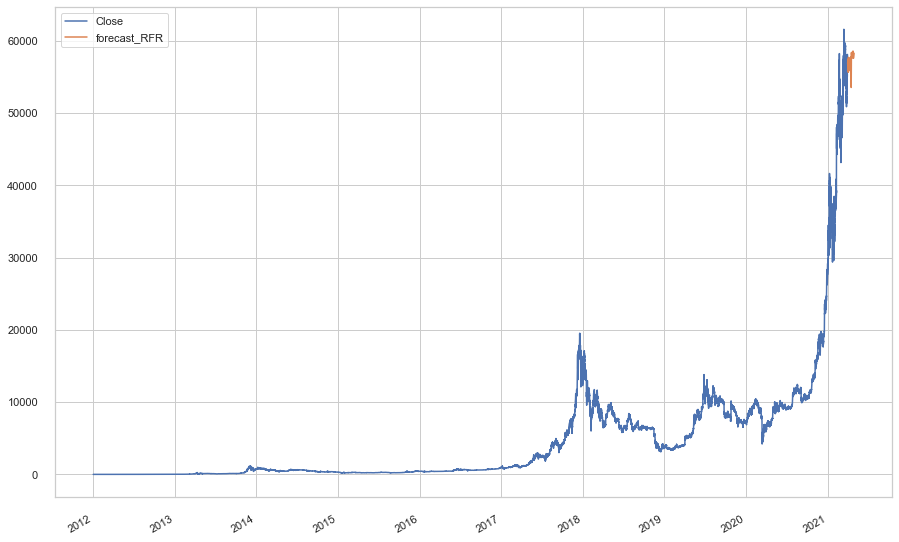

In [25]:
#Now we'll plot our forecast! 
data1['Close'].plot(figsize=(15,10),label='Close')
data1['Forecast_RFR'].plot(label='forecast_RFR')
plt.legend()

In [74]:
Comparison4['Actual_Price'].plot(figsize=(15,10),label='Actual_Price')
Comparison4['Forecast_RFR'].plot(label='Forecast_RFR')
plt.legend()

NameError: name 'Comparison4' is not defined

求随机森林模型的MSE 、 RMSE、 MAE、R^2

In [26]:
print("mean_absolute_error:", mean_absolute_error(y_test, preds))  
print("mean_squared_error:", mean_squared_error(y_test, preds))
print("rmse:", sqrt(mean_squared_error(y_test, preds)))
print("r2 score:", r2_score(y_test, preds))   #score = explained_variance_score(y_test,preds)

mean_absolute_error: 177.69388812917236
mean_squared_error: 249911.74593932717
rmse: 499.91173814917283
r2 score: 0.996224062730156


# XGBoost

In [27]:
Xgb_model = xgb.XGBRegressor(objective ='reg:linear',min_child_weight=10, booster='gbtree', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
Xgb_model.fit(X_train,y_train)
accuracy=Xgb_model.score(X_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')

[10:08:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:09:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy is: 99.6761 %


In [28]:
preds1 = Xgb_model.predict(X_test)
print("The prediction is:",preds1[1],"But the real value is:" ,y_test[1])

The prediction is: 6398.1504 But the real value is: 6234.34


In [29]:
#Apply our model and get our prediction
X_30=X[-30:]  #We'll take the last 30 elements to make our predictions on them
forecast1=Xgb_model.predict(X_30)

In [30]:
last_date=data.iloc[-1].name
modified_date = last_date + timedelta(days=1)
date=pd.date_range(modified_date,periods=30,freq='D')
df2=pd.DataFrame(forecast1,columns=['Forecast_XGB'],index=date)
data2=data.append(df2)
data2.tail()

,Open,High,Low,Close,ohlc_average,Price_After_Month,Forecast_XGB
2021-04-25 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,57697.503906
2021-04-26 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,57360.828125
2021-04-27 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,57084.160156
2021-04-28 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,57075.046875
2021-04-29 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,57697.503906


In [31]:
data2

,Open,High,Low,Close,ohlc_average,Price_After_Month,Forecast_XGB
2012-01-01 00:00:00,4.50,4.57,4.50,4.57,4.535,5.00,NaN
2012-01-03 19:00:00,5.32,5.32,5.32,5.32,5.320,5.57,NaN
2012-01-04 12:00:00,4.93,4.93,4.93,4.93,4.930,6.19,NaN
2012-01-04 13:00:00,4.93,4.93,4.93,4.93,4.930,6.46,NaN
2012-01-05 00:00:00,5.36,5.37,5.36,5.37,5.365,6.43,NaN
...,...,...,...,...,...,...,...
2021-04-25 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,57697.503906
2021-04-26 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,57360.828125
2021-04-27 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,57084.160156
2021-04-28 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,57075.046875


In [32]:
wq1=data2.iloc[75821:75851,]
qwq1=wq1.iloc[0:16,]
qwq1

,Open,High,Low,Close,ohlc_average,Price_After_Month,Forecast_XGB
2021-03-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,55594.425781
2021-04-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,56638.035156
2021-04-02 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,56176.835938
2021-04-03 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,56569.378906
2021-04-04 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,57116.187500
2021-04-05 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,56261.992188
2021-04-06 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,56560.003906
2021-04-07 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,56560.003906
2021-04-08 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,55708.031250
2021-04-09 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,56560.003906


In [33]:
Forecast_XGB_Frame=qwq1.drop(['Open','High','Low','Close','ohlc_average','Price_After_Month'],axis=1)
Forecast_XGB_Frame

,Forecast_XGB
2021-03-31 02:00:00,55594.425781
2021-04-01 02:00:00,56638.035156
2021-04-02 02:00:00,56176.835938
2021-04-03 02:00:00,56569.378906
2021-04-04 02:00:00,57116.187500
2021-04-05 02:00:00,56261.992188
2021-04-06 02:00:00,56560.003906
2021-04-07 02:00:00,56560.003906
2021-04-08 02:00:00,55708.031250
2021-04-09 02:00:00,56560.003906


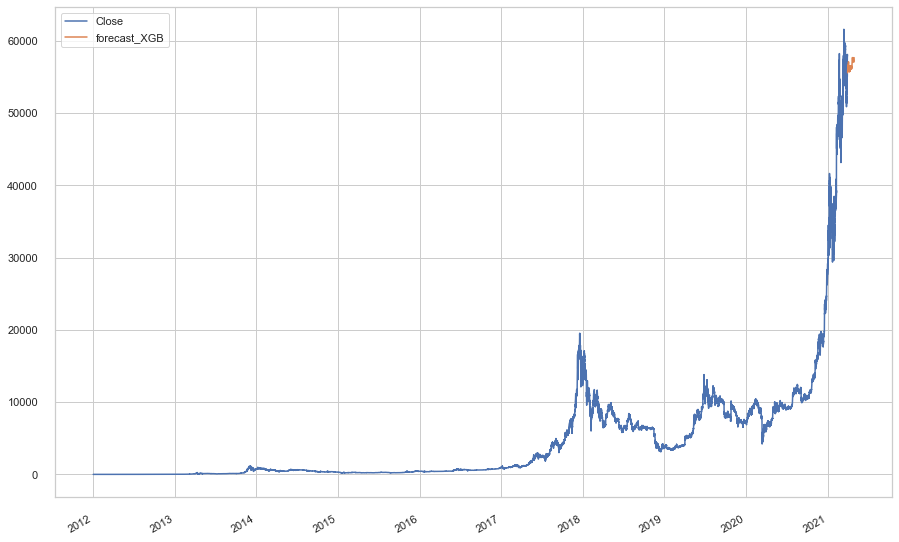

In [34]:
#Now we'll plot our forecast! 
data2['Close'].plot(figsize=(15,10),label='Close')
data2['Forecast_XGB'].plot(label='forecast_XGB')
plt.legend()

求XGBoost模型的MSE 、 RMSE、 MAE、R^2

In [35]:
print("mean_absolute_error:", mean_absolute_error(y_test, preds1))  
print("mean_squared_error:", mean_squared_error(y_test, preds1))
print("rmse:", sqrt(mean_squared_error(y_test, preds1)))
print("r2 score:", r2_score(y_test, preds1))   #score = explained_variance_score(y_test,preds)

mean_absolute_error: 162.90301815066832
mean_squared_error: 214381.30487121432
rmse: 463.0132880071741
r2 score: 0.9967608951072771


模型预测值与真实值对比

In [36]:
Comparison1=pd.concat([Actual_BitcoinPrice,Forecast_XGB_Frame],axis=1,join='inner')
Comparison2=pd.concat([Comparison1,Forecast_RFR_Frame],axis=1,join='inner')
Comparison2

NameError: name 'Actual_BitcoinPrice' is not defined

# ARIMA

In [37]:
import datetime
A1 = pd.read_csv('D:/金融辅修毕业论文—数字货币/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv',parse_dates=[0], date_parser=dateparse) 
A1.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 15:52:00+00:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 15:53:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 15:54:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 15:55:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 15:56:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
A1['Open'].fillna(method='ffill', inplace=True)
A1['High'].fillna(method='ffill', inplace=True)
A1['Low'].fillna(method='ffill', inplace=True)
A1['Close'].fillna(method='ffill', inplace=True)
A1['Weighted_Price'].fillna(method='ffill', inplace=True)
A1['Volume_(BTC)'].fillna(method='ffill', inplace=True)
A1['Volume_(Currency)'].fillna(method='ffill', inplace=True)

In [63]:
A1

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 15:52:00+00:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2011-12-31 15:53:00+00:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
2,2011-12-31 15:54:00+00:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
3,2011-12-31 15:55:00+00:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
4,2011-12-31 15:56:00+00:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
...,...,...,...,...,...,...,...,...
4857372,2021-03-31 07:56:00+00:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-31 07:57:00+00:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-31 07:58:00+00:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-31 07:59:00+00:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


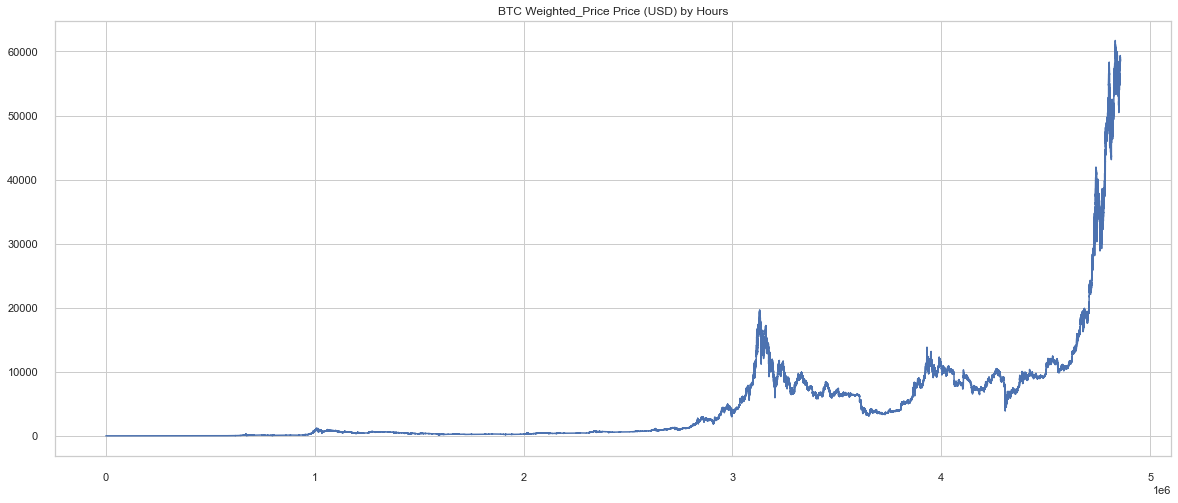

In [64]:
plt.figure(figsize=[20,8])
plt.title('BTC Weighted_Price Price (USD) by Hours')
plt.plot(A1.Weighted_Price, '-', label='By Hours')

In [65]:
A1['Timestamp'] = A1['Timestamp'].dt.tz_localize(None)
A1 = A1.groupby([pd.Grouper(key='Timestamp',freq='M')]).first().reset_index()
A1 = A1.set_index('Timestamp')
A1['Weighted_Price'].fillna(method='ffill', inplace=True)

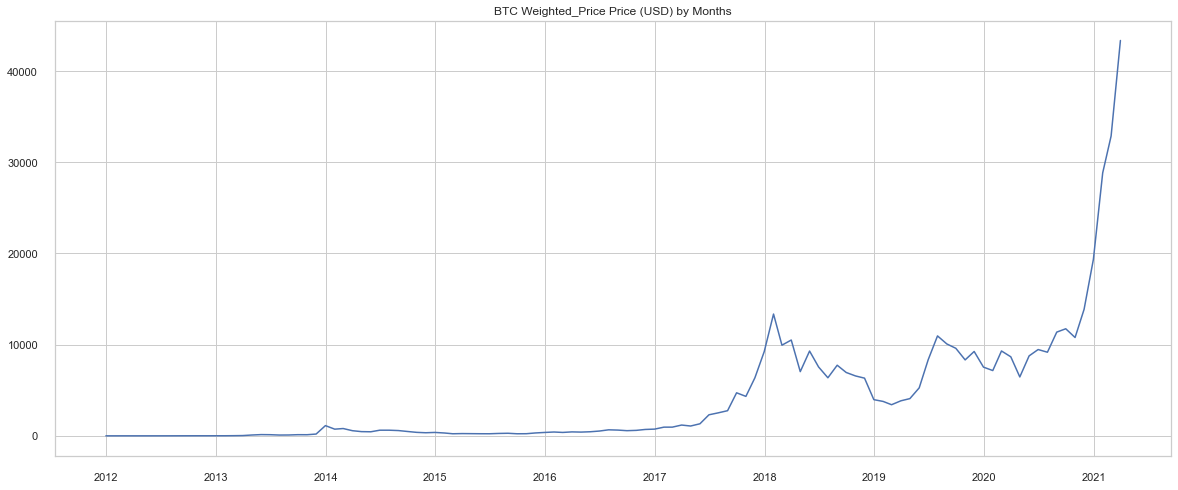

In [66]:
plt.figure(figsize=[20,8])
plt.title('BTC Weighted_Price Price (USD) by Months')
plt.plot(A1.Weighted_Price, '-', label='By Months')

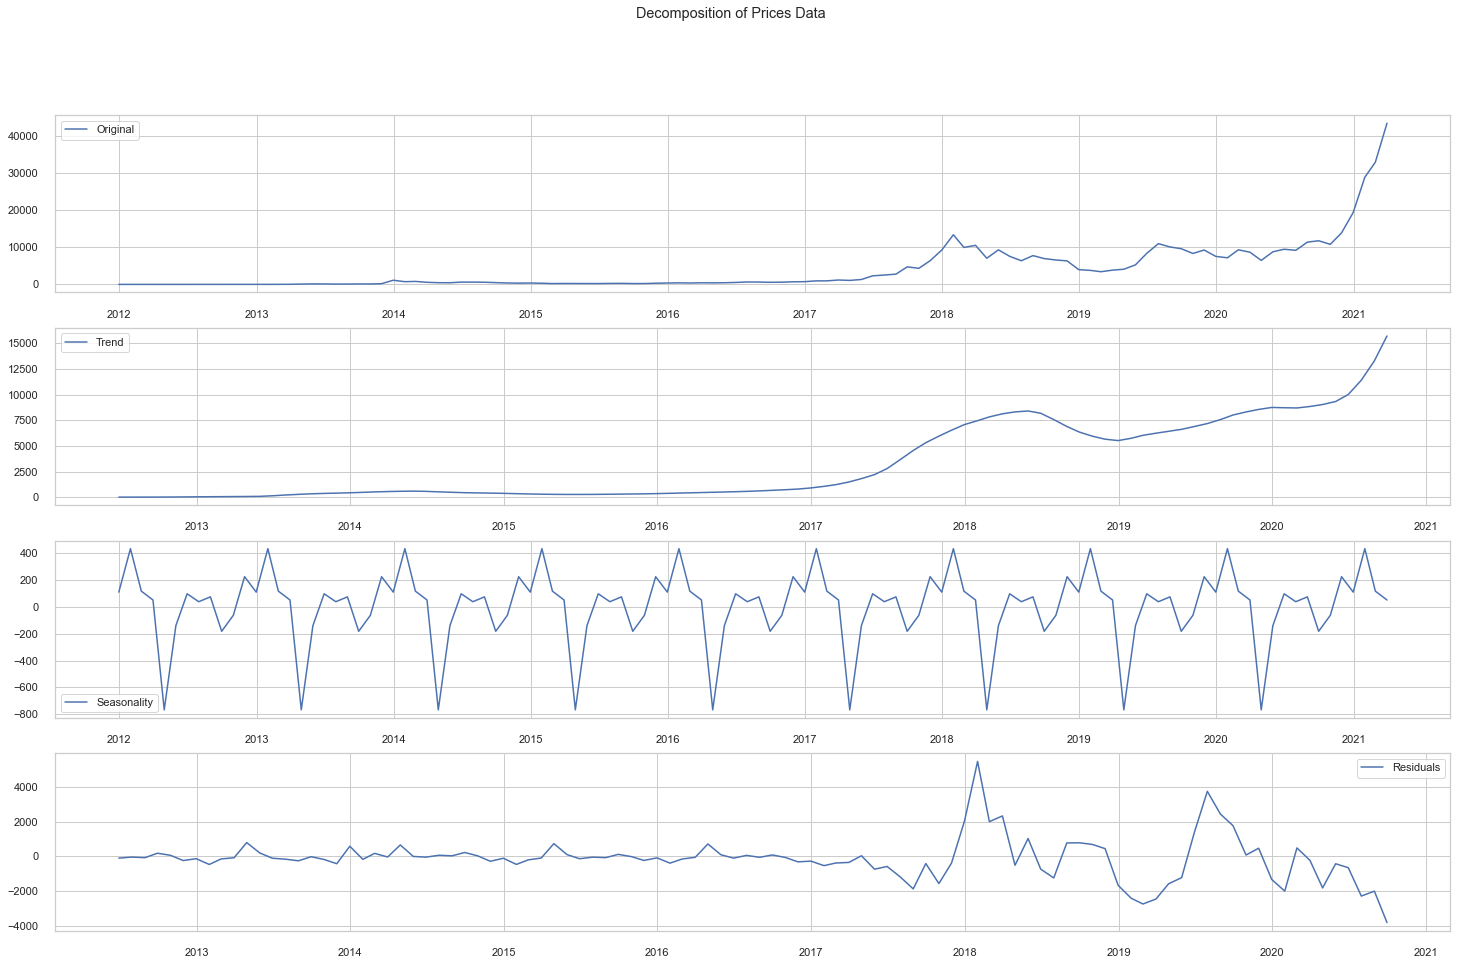

In [67]:
decomposition = sm.tsa.seasonal_decompose(A1.Weighted_Price)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = plt.figure(figsize=(25,15))

plt.subplot(411)
plt.plot(A1.Weighted_Price, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

fig.suptitle('Decomposition of Prices Data')
plt.show()

In [68]:
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(A1.Weighted_Price)[1])

Dickey–Fuller test: p=0.999024


In [69]:
print("test: p={}".format(ts.adfuller(seasonal)[1]))

test: p=0.0


In [70]:
import statsmodels.tsa.stattools as ts
def judge_stationarity(data_sanya_one):
    dftest = ts.adfuller(data_sanya_one)
    print(dftest)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    stationarity = 1
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value 
        if dftest[0] > value:
                stationarity = 0
    print(dfoutput)
    print("是否平稳(1/0): %d" %(stationarity))
    return stationarity

#stationarity = judge_stationarity(residual)

In [71]:
stationarity = judge_stationarity(A1.Weighted_Price)

(2.4310438682866478, 0.9990241782967091, 2, 109, {'1%': -3.49181775886872, '5%': -2.8884437992971588, '10%': -2.5811201893779985}, 1727.1203068270852)
Test Statistic                   2.431044
p-value                          0.999024
#Lags Used                       2.000000
Number of Observations Used    109.000000
Critical Value (1%)             -3.491818
Critical Value (5%)             -2.888444
Critical Value (10%)            -2.581120
dtype: float64
是否平稳(1/0): 0


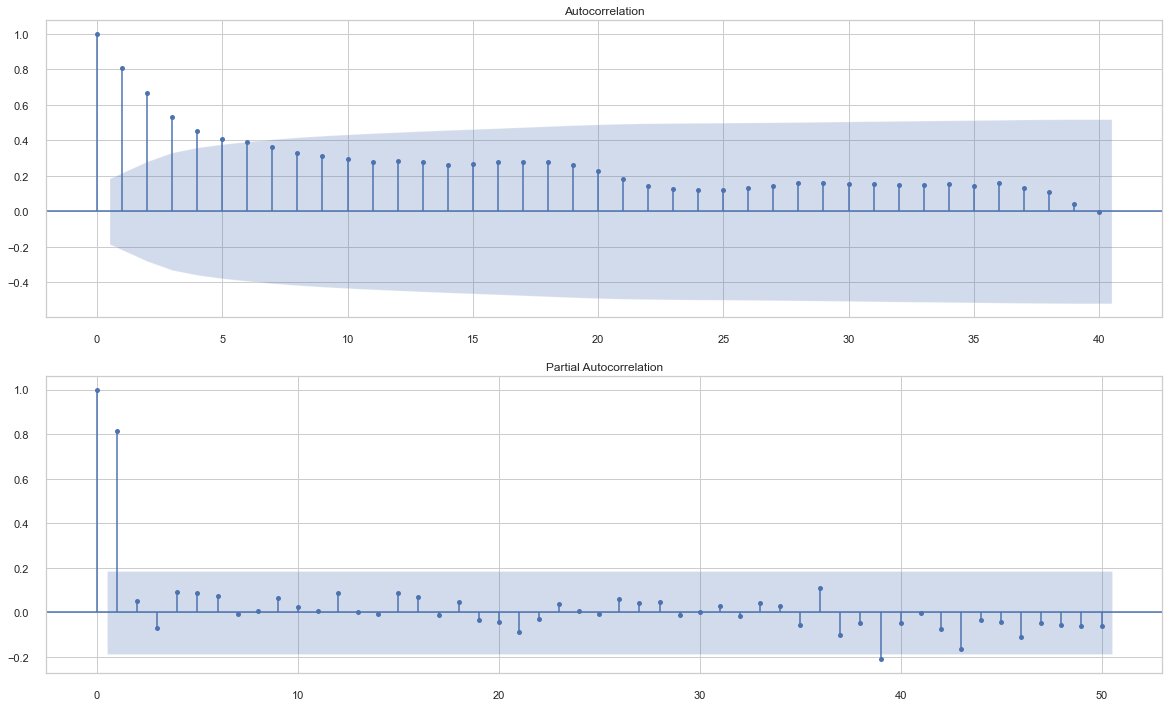

In [72]:
pyplot.figure(figsize=(20,12))
pyplot.subplot(211)
plot_acf(A1.Weighted_Price, ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(A1.Weighted_Price, ax=pyplot.gca(), lags=50)
pyplot.show()

In [99]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(A1.Weighted_Price, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12),enforce_stationarity=False,
                                            enforce_invertibility=False).fit(disp=-1)
    except ValueError:
        #print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [100]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters          aic
40  (2, 0, 2, 0)  1304.834272
41  (2, 0, 2, 1)  1306.473267
46  (2, 1, 2, 0)  1306.530311
52  (2, 2, 2, 0)  1307.229027
47  (2, 1, 2, 1)  1308.180732
                                 Statespace Model Results                                 
Dep. Variable:                     Weighted_Price   No. Observations:                  112
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -647.417
Date:                            Sat, 24 Apr 2021   AIC                           1304.834
Time:                                    15:31:04   BIC                           1316.287
Sample:                                12-31-2011   HQIC                          1309.398
                                     - 03-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------

Dickey–Fuller test:: p=0.000000


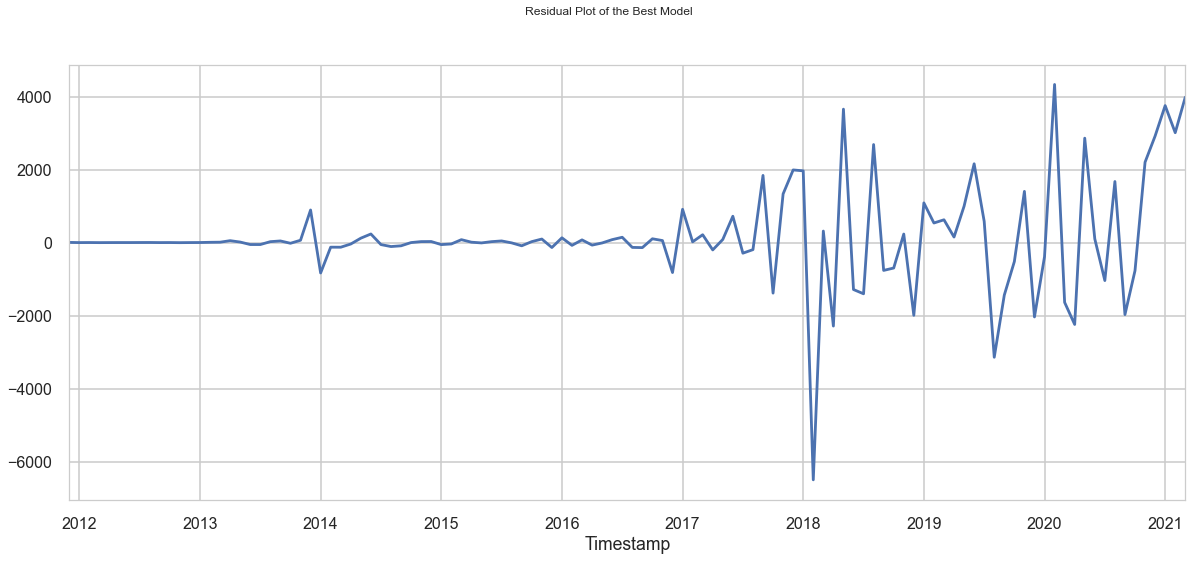

In [101]:
fig = plt.figure(figsize=(20,8))
best_model.resid.plot()
fig.suptitle('Residual Plot of the Best Model')
print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid)[1])

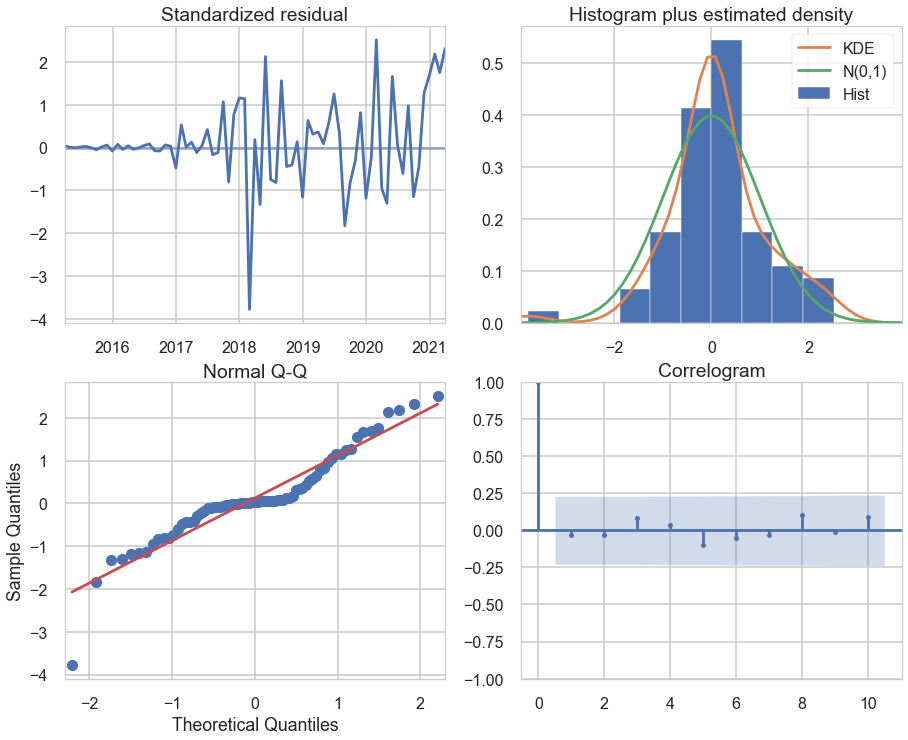

In [102]:
#plot_diagnostics对象允许我们快速生成模型诊断并调查任何异常行为。
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

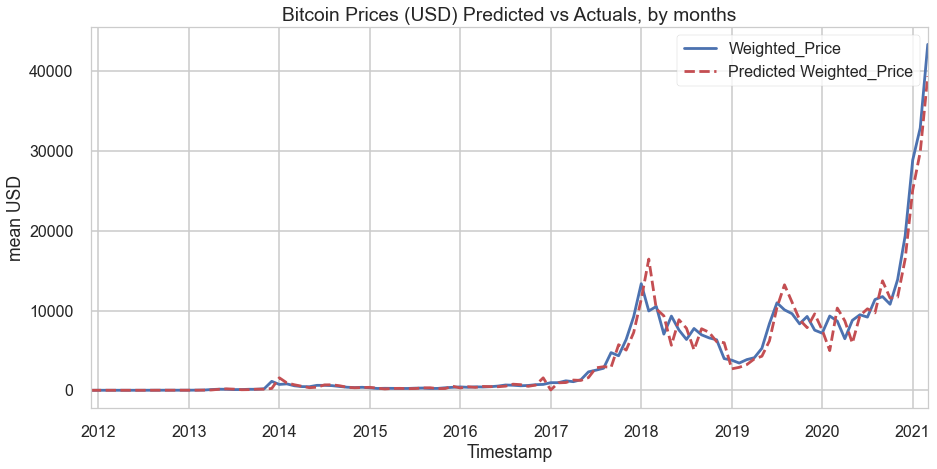

In [103]:
df_month2 = A1[['Weighted_Price']]
future = pd.DataFrame()
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = best_model.predict(start=0, end=pd.to_datetime('2021-03-31'))
plt.figure(figsize=(15,7))
df_month2.Weighted_Price.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin Prices (USD) Predicted vs Actuals, by months')
plt.ylabel('mean USD')
plt.show()

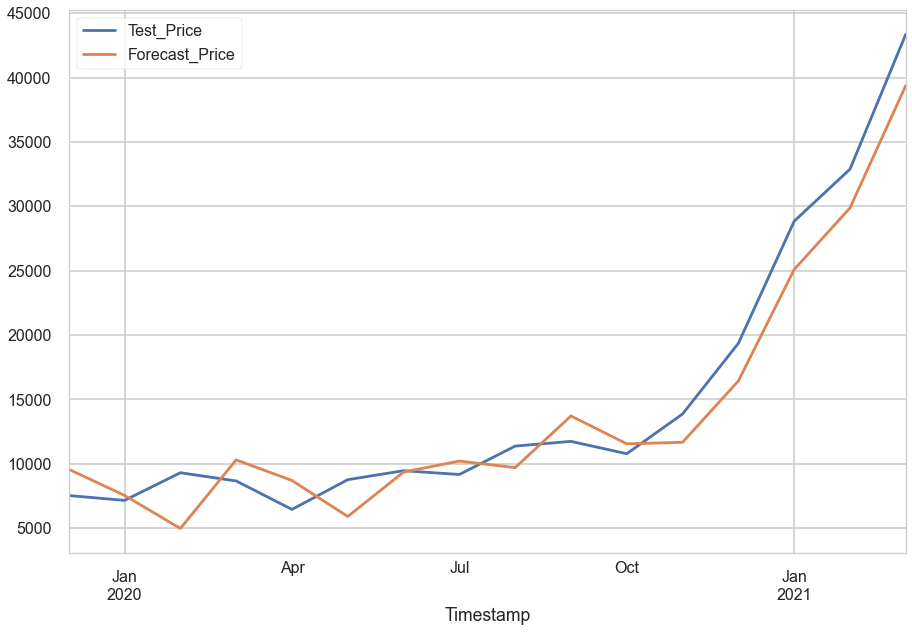

In [109]:
zhanshi=df_month2.iloc[96:112,]
zhanshi['Weighted_Price'].plot(figsize=(15,10),label='Test_Price')
zhanshi['forecast'].plot(label='Forecast_Price')
xticks=list(range(0,len(zhanshi),40))
plt.legend()

In [110]:
pred6 = best_model.get_prediction(start=pd.to_datetime('2021-03-31'), dynamic=False)
pred_ci = pred6.conf_int()

In [159]:
best_model.forecast(5)

2021-04-30    48177.433681
2021-05-31    58092.067083
2021-06-30    64048.241348
2021-07-31    70110.494025
2021-08-31    77161.100100
Freq: M, dtype: float64

In [157]:
Contrast=df_month2.iloc[1:112,]
y_true = Contrast['Weighted_Price']
y_pre = Contrast['forecast']

计算ARIMA模型的MAE,MSE,RMSE,R^2

In [158]:
print("mean_absolute_error:", mean_absolute_error(y_true, y_pre))  
print("mean_squared_error:", mean_squared_error(y_true, y_pre))
print("rmse:", sqrt(mean_squared_error(y_true, y_pre)))
print("r2 score:", r2_score(y_true, y_pre))   

mean_absolute_error: 774.7861303160493
mean_squared_error: 1959242.9729228984
rmse: 1399.7296070752016
r2 score: 0.9564245907904205


# SVR (linear kernel)

In [38]:
# 线性核函数配置支持向量机
linear_svr = SVR(kernel="linear")
# 训练
linear_svr.fit(X_train,y_train)
# 预测 保存预测结果
linear_svr_y_predict = linear_svr.predict(X_test)

In [39]:
#Apply our model and get our prediction
X_30=X[-30:]  #We'll take the last 30 elements to make our predictions on them
forecast2=linear_svr.predict(X_30)

In [40]:
last_date=data.iloc[-1].name
modified_date = last_date + timedelta(days=1)
date=pd.date_range(modified_date,periods=30,freq='D')
df4=pd.DataFrame(forecast2,columns=['Forecast_linear_svr'],index=date)
data4=data.append(df4)
data4.tail()

,Open,High,Low,Close,ohlc_average,Price_After_Month,Forecast_linear_svr
2021-04-25 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,58082.592779
2021-04-26 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,58230.732275
2021-04-27 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,57766.665593
2021-04-28 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,57682.586510
2021-04-29 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,58020.530267


In [41]:
data4

,Open,High,Low,Close,ohlc_average,Price_After_Month,Forecast_linear_svr
2012-01-01 00:00:00,4.50,4.57,4.50,4.57,4.535,5.00,NaN
2012-01-03 19:00:00,5.32,5.32,5.32,5.32,5.320,5.57,NaN
2012-01-04 12:00:00,4.93,4.93,4.93,4.93,4.930,6.19,NaN
2012-01-04 13:00:00,4.93,4.93,4.93,4.93,4.930,6.46,NaN
2012-01-05 00:00:00,5.36,5.37,5.36,5.37,5.365,6.43,NaN
...,...,...,...,...,...,...,...
2021-04-25 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,58082.592779
2021-04-26 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,58230.732275
2021-04-27 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,57766.665593
2021-04-28 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,57682.586510


In [42]:
wq3=data4.iloc[75821:75851,]
qwq3=wq3.iloc[0:16,]
qwq3

,Open,High,Low,Close,ohlc_average,Price_After_Month,Forecast_linear_svr
2021-03-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,55579.409762
2021-04-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,55788.427945
2021-04-02 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,55922.275835
2021-04-03 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,56512.220519
2021-04-04 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,56376.942686
2021-04-05 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,56062.121431
2021-04-06 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,55320.021238
2021-04-07 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,55258.748453
2021-04-08 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,54971.527822
2021-04-09 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,55205.990793


In [43]:
Forecast_linear_svr_Frame=qwq3.drop(['Open','High','Low','Close','ohlc_average','Price_After_Month'],axis=1)
Forecast_linear_svr_Frame

,Forecast_linear_svr
2021-03-31 02:00:00,55579.409762
2021-04-01 02:00:00,55788.427945
2021-04-02 02:00:00,55922.275835
2021-04-03 02:00:00,56512.220519
2021-04-04 02:00:00,56376.942686
2021-04-05 02:00:00,56062.121431
2021-04-06 02:00:00,55320.021238
2021-04-07 02:00:00,55258.748453
2021-04-08 02:00:00,54971.527822
2021-04-09 02:00:00,55205.990793


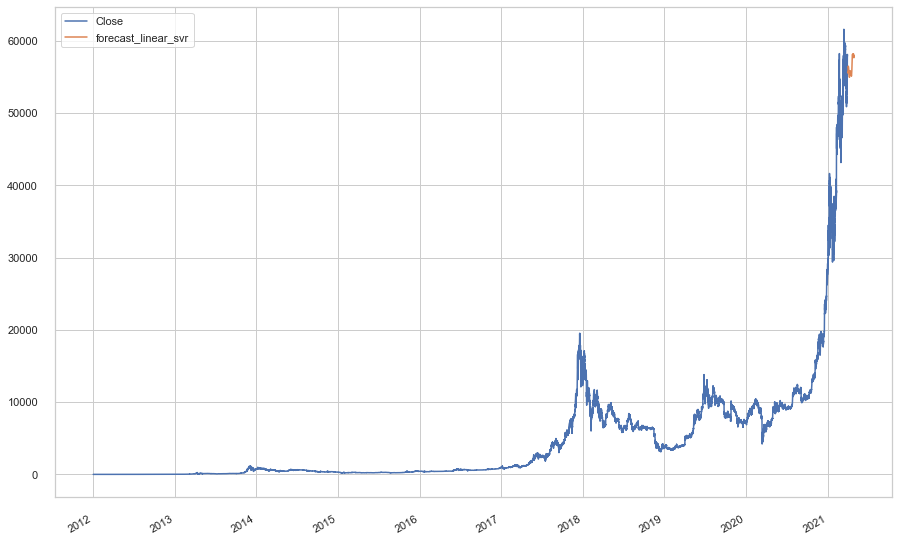

In [44]:
#Now we'll plot our forecast! 
data4['Close'].plot(figsize=(15,10),label='Close')
data4['Forecast_linear_svr'].plot(label='forecast_linear_svr')
plt.legend()

In [50]:
Comparison3['Forecast_linear_svr'].plot(figsize=(15,10),label='forecast_linear_svr')
Comparison3['Actual_Price'].plot(label='Actual_Price')
plt.legend()

NameError: name 'Comparison3' is not defined

In [46]:
print("mean_absolute_error:", mean_absolute_error(y_test, linear_svr_y_predict))  
print("mean_squared_error:", mean_squared_error(y_test, linear_svr_y_predict))
print("rmse:", sqrt(mean_squared_error(y_test, linear_svr_y_predict)))
print("r2 score:", r2_score(y_test, linear_svr_y_predict))   #score = explained_variance_score(y_test,preds)

mean_absolute_error: 171.9388397019182
mean_squared_error: 254687.60355820908
rmse: 504.665833555442
r2 score: 0.9961519039018031


# SVR (poly kernel)

In [55]:
# 多项式核函数配置支持向量机
poly_svr = SVR(kernel="poly")
# 训练
poly_svr.fit(X_train,y_train)
# 预测 保存预测结果
poly_svr_y_predict = poly_svr.predict(X_test)

In [56]:
#Apply our model and get our prediction
X_30=X[-30:]  #We'll take the last 30 elements to make our predictions on them
forecast4=linear_svr.predict(X_30)

In [57]:
last_date=data.iloc[-1].name
modified_date = last_date + timedelta(days=1)
date=pd.date_range(modified_date,periods=30,freq='D')
df5=pd.DataFrame(forecast4,columns=['Forecast_poly_svr'],index=date)
data5=data.append(df5)
data5.tail()

,Open,High,Low,Close,ohlc_average,Price_After_Month,Forecast_poly_svr
2021-04-25 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,58082.592779
2021-04-26 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,58230.732275
2021-04-27 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,57766.665593
2021-04-28 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,57682.586510
2021-04-29 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,58020.530267


In [58]:
data5

,Open,High,Low,Close,ohlc_average,Price_After_Month,Forecast_poly_svr
2012-01-01 00:00:00,4.50,4.57,4.50,4.57,4.535,5.00,NaN
2012-01-03 19:00:00,5.32,5.32,5.32,5.32,5.320,5.57,NaN
2012-01-04 12:00:00,4.93,4.93,4.93,4.93,4.930,6.19,NaN
2012-01-04 13:00:00,4.93,4.93,4.93,4.93,4.930,6.46,NaN
2012-01-05 00:00:00,5.36,5.37,5.36,5.37,5.365,6.43,NaN
...,...,...,...,...,...,...,...
2021-04-25 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,58082.592779
2021-04-26 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,58230.732275
2021-04-27 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,57766.665593
2021-04-28 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,57682.586510


In [59]:
wq4=data5.iloc[75821:75851,]
qwq4=wq4.iloc[0:16,]
qwq4

,Open,High,Low,Close,ohlc_average,Price_After_Month,Forecast_poly_svr
2021-03-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,55579.409762
2021-04-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,55788.427945
2021-04-02 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,55922.275835
2021-04-03 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,56512.220519
2021-04-04 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,56376.942686
2021-04-05 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,56062.121431
2021-04-06 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,55320.021238
2021-04-07 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,55258.748453
2021-04-08 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,54971.527822
2021-04-09 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,55205.990793


In [60]:
Forecast_poly_svr_Frame=qwq4.drop(['Open','High','Low','Close','ohlc_average','Price_After_Month'],axis=1)
Forecast_poly_svr_Frame

,Forecast_poly_svr
2021-03-31 02:00:00,55579.409762
2021-04-01 02:00:00,55788.427945
2021-04-02 02:00:00,55922.275835
2021-04-03 02:00:00,56512.220519
2021-04-04 02:00:00,56376.942686
2021-04-05 02:00:00,56062.121431
2021-04-06 02:00:00,55320.021238
2021-04-07 02:00:00,55258.748453
2021-04-08 02:00:00,54971.527822
2021-04-09 02:00:00,55205.990793


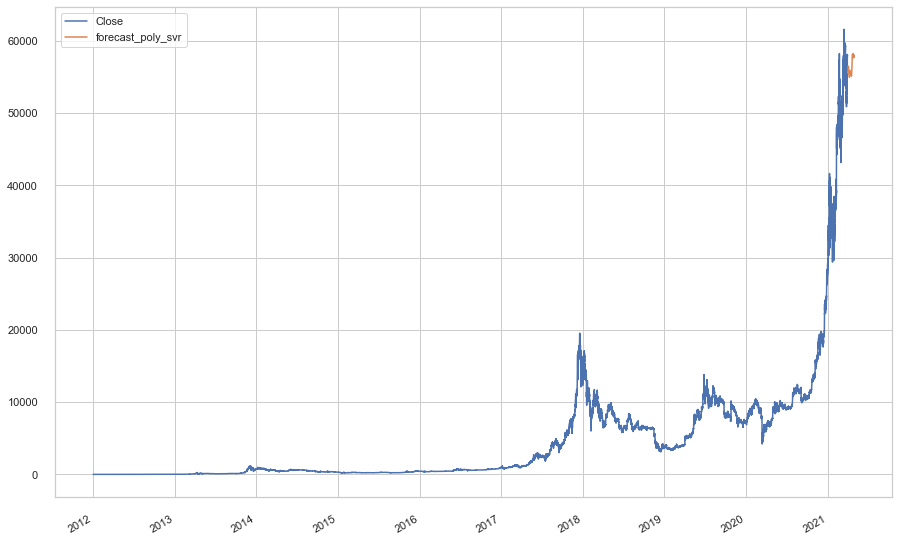

In [61]:
#Now we'll plot our forecast! 
data5['Close'].plot(figsize=(15,10),label='Close')
data5['Forecast_poly_svr'].plot(label='forecast_poly_svr')
plt.legend()

In [78]:
print("mean_absolute_error:", mean_absolute_error(y_test, poly_svr_y_predict))  
print("mean_squared_error:", mean_squared_error(y_test, poly_svr_y_predict))
print("rmse:", sqrt(mean_squared_error(y_test, poly_svr_y_predict)))
print("r2 score:", r2_score(y_test, poly_svr_y_predict))   #score = explained_variance_score(y_test,preds)

mean_absolute_error: 3668.2753697135477
mean_squared_error: 34813145.390938304
rmse: 5900.266552532886
r2 score: 0.47400530267970176


In [51]:
Comparison1=pd.concat([Actual_BitcoinPrice,Forecast_XGB_Frame],axis=1,join='inner')
Comparison2=pd.concat([Comparison1,Forecast_RFR_Frame],axis=1,join='inner')
Comparison3=pd.concat([Comparison2,Forecast_linear_svr_Frame],axis=1,join='inner')
Comparison3

,Actual_Price,Forecast_XGB,Forecast_RFR,Forecast_linear_svr
2021-03-31 02:00:00,58849.76,55594.425781,56821.25865,55579.409762
2021-04-01 02:00:00,59280.83,56638.035156,57468.95355,55788.427945
2021-04-02 02:00:00,58670.40,56176.835938,56777.71720,55922.275835
2021-04-03 02:00:00,59067.71,56569.378906,55668.31835,56512.220519
2021-04-04 02:00:00,58410.16,57116.187500,57750.60205,56376.942686
2021-04-05 02:00:00,58083.95,56261.992188,56732.71850,56062.121431
2021-04-06 02:00:00,58850.00,56560.003906,57261.99815,55320.021238
2021-04-07 02:00:00,58202.47,56560.003906,57295.98130,55258.748453
2021-04-08 02:00:00,55788.70,55708.031250,55905.11710,54971.527822
2021-04-09 02:00:00,57924.82,56560.003906,56687.90435,55205.990793


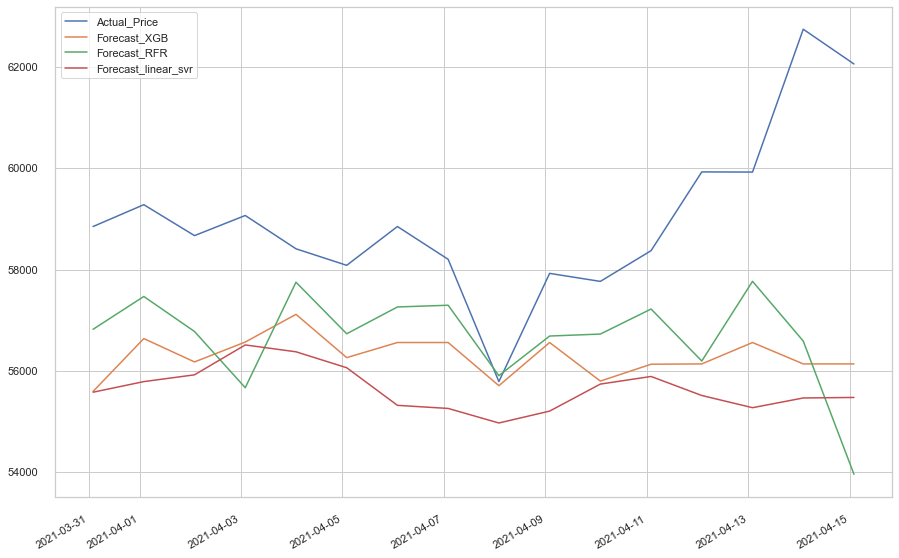

In [52]:
#Now we'll plot our forecast! 
Comparison3['Actual_Price'].plot(figsize=(15,10),label='Actual_Price')
Comparison3['Forecast_XGB'].plot(label='Forecast_XGB')
Comparison3['Forecast_RFR'].plot(label='Forecast_RFR')
Comparison3['Forecast_linear_svr'].plot(label='Forecast_linear_svr')
plt.legend()

# Comparision

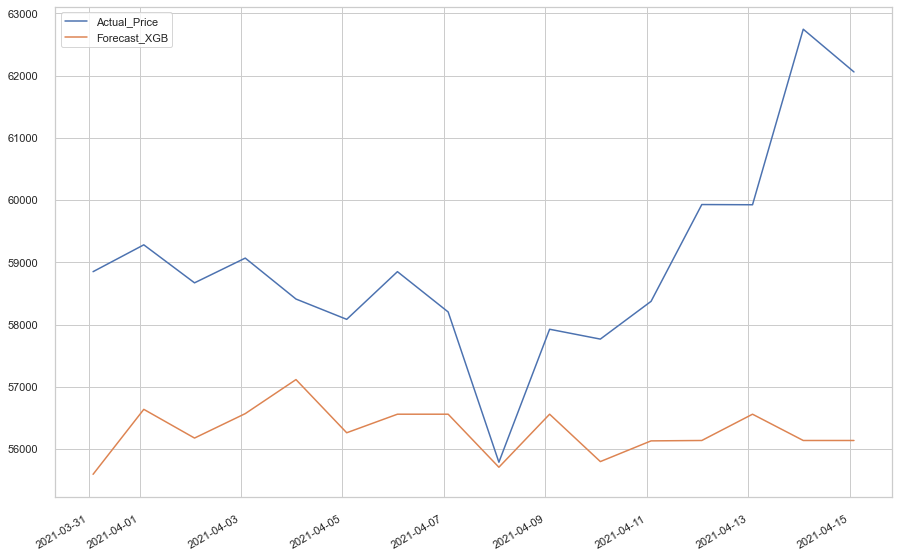

In [65]:
Comparison3['Actual_Price'].plot(figsize=(15,10),label='Actual_Price')
Comparison3['Forecast_XGB'].plot(label='Forecast_XGB')
plt.legend()

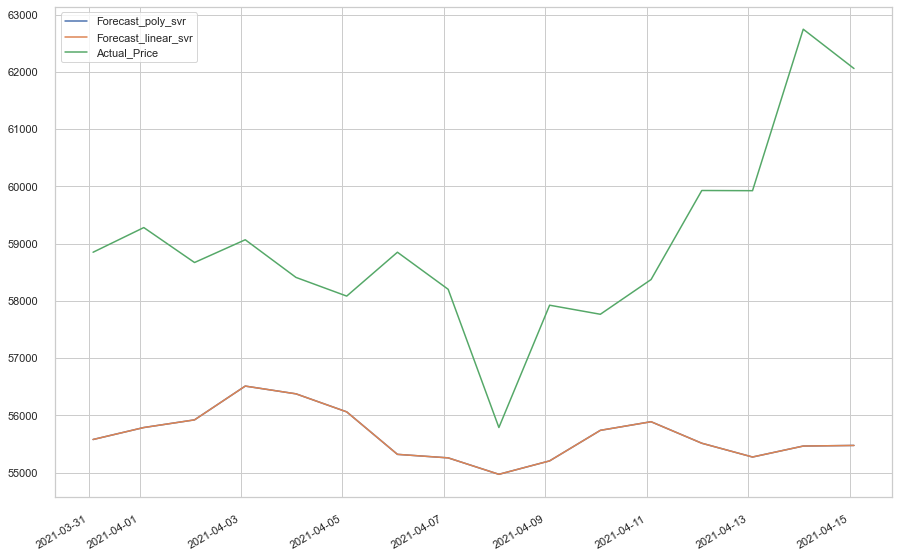

In [77]:
Comparison3['Forecast_poly_svr'].plot(label='Forecast_poly_svr')
Comparison3['Forecast_linear_svr'].plot(label='Forecast_linear_svr')
Comparison3['Actual_Price'].plot(figsize=(15,10),label='Actual_Price')
plt.legend()

# Summary

In [77]:
from collections import OrderedDict
Comment=OrderedDict([ ('Model Name', ['ARIMA', 'XGBoost', 'SVR','Random Forest Regression','LSTM']),
          ('MSE', [1959242.97, 214381.30, 254687.60,249911.75,159322.58]) ,
                 ('RMSE',[1399.73,463.01,504.67,499.91,399.15]),
                   ('MAE',[774.79,162.90,171.94,177.69,368.32]),
                    ('R^2_score',['95.64%','99.68%','99.62%','99.62%','98.96%'])])

In [78]:
Comment_f= pd.DataFrame.from_dict(Comment)
Comment_f

,Model Name,MSE,RMSE,MAE,R^2_score
0,ARIMA,1959242.97,1399.73,774.79,95.64%
1,XGBoost,214381.30,463.01,162.90,99.68%
2,SVR,254687.60,504.67,171.94,99.62%
3,Random Forest Regression,249911.75,499.91,177.69,99.62%
4,LSTM,159322.58,399.15,368.32,98.96%
